### Importing libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Define path

path = r'C:\Users\fiyin\OneDrive\Documents\InstaCart Basket Analysis'

In [3]:
# Import data

ords_prods_merged = pd.read_pickle(os.path.join(path, '02. Data', 'Prepared data', 'orders_products_merged.pkl'))

In [4]:
ords_prods_merged.shape

(32404859, 22)

In [5]:
ords_prods_merged.head()

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_habits,median_days_last_order,customer_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,9.0,Mid-range product,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,9.0,Mid-range product,Slowest days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,9.0,Mid-range product,Slowest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer


### Creating bar charts

<AxesSubplot:>

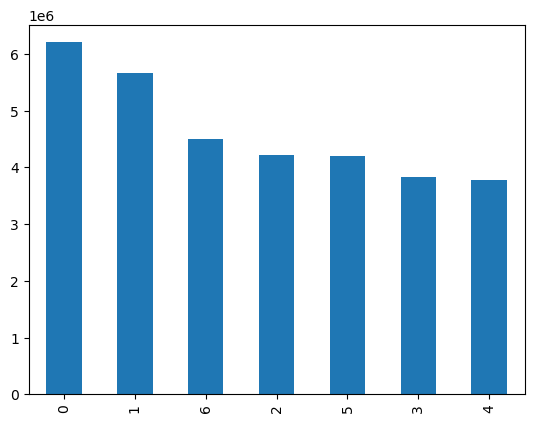

In [7]:
ords_prods_merged['order_day_of_week'].value_counts().plot.bar()

In [8]:
ords_prods_merged['order_day_of_week'].value_counts(dropna = False)

0    6204182
1    5660230
6    4496490
2    4213830
5    4205791
3    3840534
4    3783802
Name: order_day_of_week, dtype: int64

<AxesSubplot:>

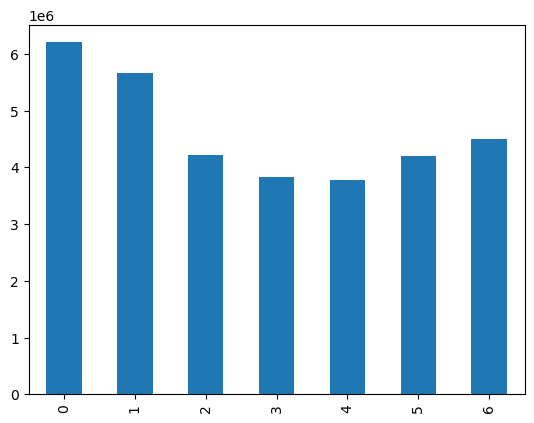

In [9]:
# Sort bar chart according to index value

ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar()

plt.title('Order frequency during the week')
plt.xlabel('Days of the week')
plt.ylabel()

In [10]:
ords_prods_merged['order_day_of_week'].value_counts(dropna = False).sort_index()

0    6204182
1    5660230
2    4213830
3    3840534
4    3783802
5    4205791
6    4496490
Name: order_day_of_week, dtype: int64

<AxesSubplot:>

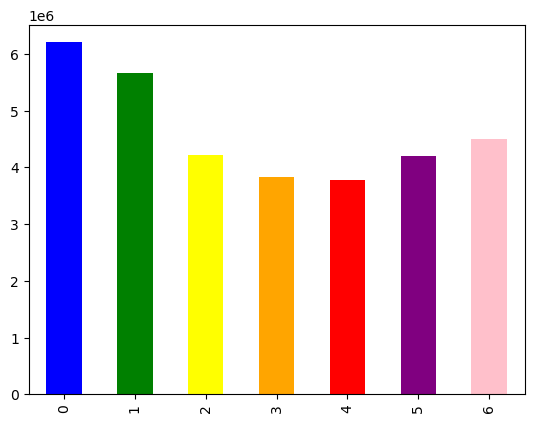

In [11]:
# Adding color

ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue', 'green', 'yellow', 'orange', 'red', 'purple', 'pink'])

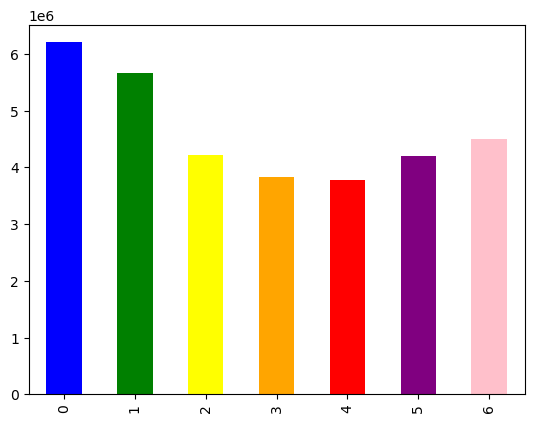

In [12]:
bar = ords_prods_merged['order_day_of_week'].value_counts().sort_index().plot.bar(color = ['blue', 'green', 'yellow', 'orange', 'red', 'purple', 'pink'])

In [18]:
# Export chart

bar.figure.savefig(os.path.join(path, '04. Analysis', 'Visualizations', 'bar_orders_dow.png'))

### Creating histograms and scatterplots

<AxesSubplot:ylabel='Frequency'>

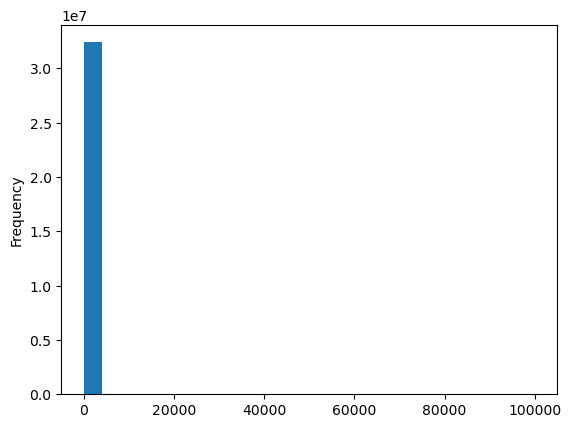

In [16]:
# Create a histogram of 'prices' column

ords_prods_merged['prices'].plot.hist(bins = 25)

In [17]:
# Summary statistics

ords_prods_merged['prices'].describe()

count    3.240486e+07
mean     1.198023e+01
std      4.956554e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

<AxesSubplot:xlabel='prices', ylabel='prices'>

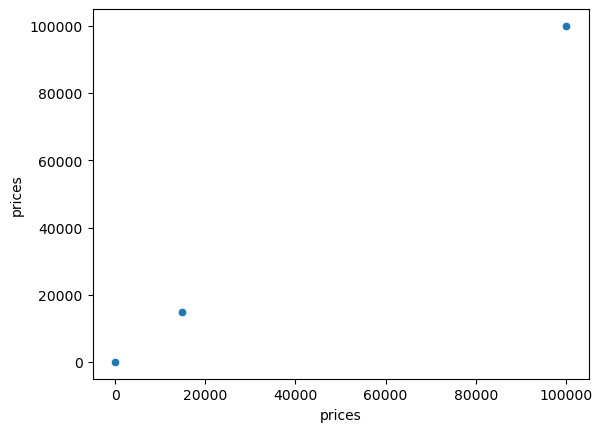

In [15]:
# Create a scatterplot of 'prices' column to visualize outliers

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merged)

In [18]:
# Check for unusual prices

ords_prods_merged.loc[ords_prods_merged['prices'] > 100]

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_habits,median_days_last_order,customer_frequency
10030345,912404,17,12,2,14,5.0,21553,5,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030346,603376,17,22,6,16,4.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regularly busy,Most orders,40,Regular customer,108.648299,High spender,5.0,Frequent customer
10030347,3264360,135,2,2,21,13.0,21553,6,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Regularly busy,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030348,892534,135,3,0,8,12.0,21553,3,1,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Average orders,4,New customer,1154.792308,High spender,12.0,Regular customer
10030349,229704,342,8,1,19,30.0,21553,9,0,Lowfat 2% Milkfat Cottage Cheese,...,14900.0,High-range product,Busiest days,Average orders,16,Regular customer,114.426619,High spender,23.0,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,2249946,204099,29,0,8,4.0,33664,1,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Busiest days,Average orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166210,2363282,204099,31,0,9,2.0,33664,1,1,2 % Reduced Fat Milk,...,99999.0,High-range product,Busiest days,Most orders,39,Regular customer,1106.743956,High spender,4.0,Frequent customer
29166211,3181945,204395,13,3,15,8.0,33664,25,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Slowest days,Most orders,15,Regular customer,451.153540,High spender,5.0,Frequent customer
29166212,2486215,205227,7,3,20,4.0,33664,8,0,2 % Reduced Fat Milk,...,99999.0,High-range product,Slowest days,Average orders,12,Regular customer,1178.381871,High spender,12.0,Regular customer


In [20]:
# Convert unusual prices to missing values

ords_prods_merged.loc[ords_prods_merged['prices'] > 100] = np.nan

In [21]:
# Check missing values

ords_prods_merged.isnull().sum()

order_id                      5127
user_id                       5127
number_of_items_ordered       5127
order_day_of_week             5127
order_hour_of_day             5127
days_since_prior_order     2080872
product_id                    5127
add_to_cart_order             5127
reordered                     5127
product_name                  5127
aisle_id                      5127
department_id                 5127
prices                        5127
price_range                   5127
busiest_days                  5127
busiest_period_of_day         5127
max_order                     5127
loyalty_flag                  5127
avg_price                     5127
spending_habits               5127
median_days_last_order        5132
customer_frequency            5132
dtype: int64

In [28]:
# Check for duplicates

dups = ords_prods_merged[ords_prods_merged.duplicated()]

In [29]:
dups 

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_habits,median_days_last_order,customer_frequency
10030346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10030347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10030348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10030349,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10030350,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29166209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29166210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29166211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29166212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Dropping duplicates

ords_prods_merged2 = ords_prods_merged.drop_duplicates()

In [45]:
# Checking missing values

ords_prods_merged2.isnull().sum()

order_id                         1
user_id                          1
number_of_items_ordered          1
order_day_of_week                1
order_hour_of_day                1
days_since_prior_order     2075746
product_id                       1
add_to_cart_order                1
reordered                        1
product_name                     1
aisle_id                         1
department_id                    1
prices                           1
price_range                      1
busiest_days                     1
busiest_period_of_day            1
max_order                        1
loyalty_flag                     1
avg_price                        1
spending_habits                  1
median_days_last_order           6
customer_frequency               6
dtype: int64

In [46]:
# Checking missing data in 'user_id' column

ords_prods_merged2[ords_prods_merged2['user_id'].isnull() == True]

,order_id,user_id,number_of_items_ordered,order_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_habits,median_days_last_order,customer_frequency
10030345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
# Deleting row

ords_prods_merged2 = ords_prods_merged2.drop(10030345)

In [49]:
# Checking missing values

ords_prods_merged2.isnull().sum()

order_id                         0
user_id                          0
number_of_items_ordered          0
order_day_of_week                0
order_hour_of_day                0
days_since_prior_order     2075745
product_id                       0
add_to_cart_order                0
reordered                        0
product_name                     0
aisle_id                         0
department_id                    0
prices                           0
price_range                      0
busiest_days                     0
busiest_period_of_day            0
max_order                        0
loyalty_flag                     0
avg_price                        0
spending_habits                  0
median_days_last_order           5
customer_frequency               5
dtype: int64

In [50]:
# Checking new maximum of 'prices' column

ords_prods_merged2['prices'].max()

25.0

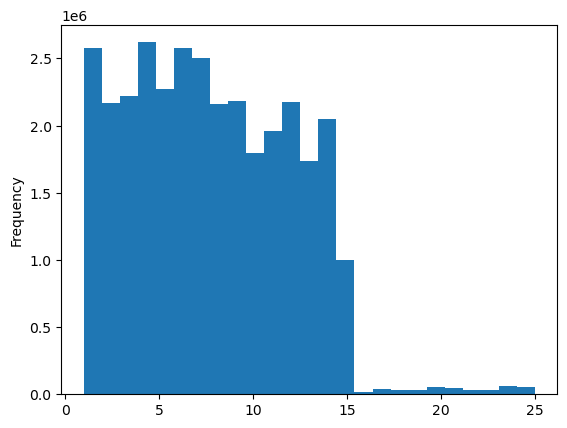

In [51]:
# Creating histogram

hist = ords_prods_merged2['prices'].plot.hist(bins = 25)

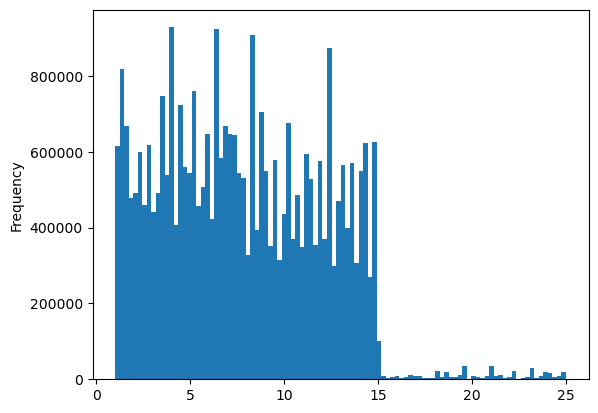

In [62]:
# Increase bin size 

hist = ords_prods_merged2['prices'].plot.hist(bins = 100)

### Sampling data

In [53]:
# Set seed for random number generator

np.random.seed(4)

In [54]:
# Create a list holding True/False values to the test np.random.rand() <= 0.7

dev = np.random.rand(len(ords_prods_merged2)) <= 0.7

In [55]:
dev

array([False,  True, False, ..., False,  True,  True])

In [56]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merged2[dev]

In [57]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merged2[~dev]

In [58]:
len(ords_prods_merged2)

32399732

In [59]:
len(big) + len(small)

32399732

### Creating line charts

In [60]:
# Create dataframe using only the two relevant columns

df_2 = small[['order_day_of_week','prices']]

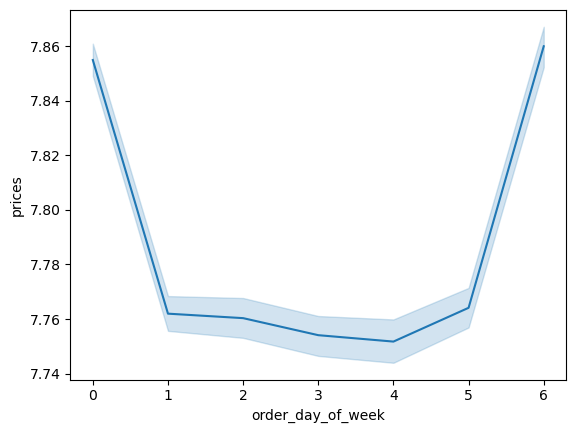

In [61]:
# Create line chart of 'order_day_of_week' and 'prices'

line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')

### Exporting data

In [64]:
ords_prods_merged2.to_pickle(os.path.join(path, '02. Data', 'Prepared data', 'orders_products_merged.pkl'))